In [360]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math

# Importing the library for models
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import f1_score, zero_one_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from itertools import combinations 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

*Problem 1*

In [ ]:
np.random.seed(123)
x = np.random.normal(0, 1, (200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0, 1, (200))

In [ ]:
#splitting the dataset into 75%-25% train-test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 100, test_size = 0.25)

In [ ]:
X_train = np.asarray(X_train).reshape(-1, 1)
y_train = np.asarray(y_train).reshape(-1, 1)
X_test = np.asarray(X_test).reshape(-1, 1)
y_test = np.asarray(y_test).reshape(-1, 1)

In [ ]:
x = np.asarray(x).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)

**Best Subset Selection**

In [ ]:
def Ordinary_least_squares_fit(d_x, d_y):
    nv = sm.add_constant(d_x)
    estimate = sm.OLS(d_y, nv)
    nv_1 = estimate.fit()
    AIC_value = nv_1.aic
    BIC_value = nv_1.bic
    R_squared_adj = nv_1.rsquared_adj

    return AIC_value, BIC_value, R_squared_adj

In [ ]:
pf_model = PolynomialFeatures(degree = 10)
X_poly_features = pf_model.fit_transform(x)

In [ ]:
X_dict = {}
for i in range(1, 11):
    X_dict["degree {}".format(i)] = list(X_poly_features[:, i])

In [ ]:
X_df = pd.DataFrame.from_dict(X_dict)

In [ ]:
X_df.head()

,degree 1,degree 2,degree 3,degree 4,degree 5,degree 6,degree 7,degree 8,degree 9,degree 10
0,-1.085631,1.178594,-1.279518,1.389083,-1.508031,1.637165,-1.777356,1.929553,-2.094781,2.274159
1,0.997345,0.994698,0.992057,0.989424,0.986798,0.984178,0.981565,0.978960,0.976361,0.973769
2,0.282978,0.080077,0.022660,0.006412,0.001815,0.000513,0.000145,0.000041,0.000012,0.000003
3,-1.506295,2.268924,-3.417668,5.148015,-7.754428,11.680454,-17.594206,26.502059,-39.919911,60.131151
4,-0.578600,0.334778,-0.193703,0.112076,-0.064847,0.037521,-0.021710,0.012561,-0.007268,0.004205


In [ ]:
X_poly_features.shape

(200, 11)

In [ ]:
import itertools
AIC_values = []
BIC_values = []
Adjusted_R_squared_values = []
num_of_features = []
features_selected = []
for i in range(1, len(X_poly_features[0]) + 1):
    for combinations in itertools.combinations(X_df.columns, i):
        result = Ordinary_least_squares_fit(X_df[list(combinations)], y)
        AIC_values.append(result[0])
        BIC_values.append(result[1])
        Adjusted_R_squared_values.append(result[2])
        features_selected.append(list(combinations))
        num_of_features.append(len(combinations))

In [ ]:
df = pd.DataFrame({'features_selected': features_selected, 'AIC values': AIC_values, 'BIC values': BIC_values, 'Adjusted R Squared Values': Adjusted_R_squared_values, 'Number of Combinations': num_of_features})

In [ ]:
df.head(20)

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
0,[degree 1],1356.768181,1363.364816,0.421163,1
1,[degree 2],1387.524884,1394.121519,0.324938,1
2,[degree 3],1065.501335,1072.097970,0.865079,1
3,[degree 4],1330.869591,1337.466225,0.491468,1
4,[degree 5],1063.848982,1070.445617,0.866189,1
5,[degree 6],1308.800380,1315.397015,0.544597,1
6,[degree 7],1191.214584,1197.811219,0.747035,1
7,[degree 8],1312.165707,1318.762342,0.536870,1
8,[degree 9],1262.674980,1269.271615,0.638394,1
9,[degree 10],1323.451514,1330.048148,0.509984,1


In [ ]:
AIC_best = df[df['AIC values']==min(df['AIC values'])]
BIC_best = df[df['BIC values']==min(df['BIC values'])]
Adj_r_best = df[df['Adjusted R Squared Values']==max(df['Adjusted R Squared Values'])] 

In [ ]:
AIC_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
55,"[degree 1, degree 2, degree 3]",542.275105,555.468374,0.990236,3


In [ ]:
BIC_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
55,"[degree 1, degree 2, degree 3]",542.275105,555.468374,0.990236,3


In [ ]:
Adj_r_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
55,"[degree 1, degree 2, degree 3]",542.275105,555.468374,0.990236,3


In [ ]:
df_min_AIC_values = df[df.groupby('Number of Combinations')['AIC values'].transform(min)== df['AIC values']]

In [ ]:
df_min_BIC_values = df[df.groupby('Number of Combinations')['BIC values'].transform(min)== df['BIC values']]

In [ ]:
df_max_Adj_r_values = df[df.groupby('Number of Combinations')['Adjusted R Squared Values'].transform(max)==df['Adjusted R Squared Values']]

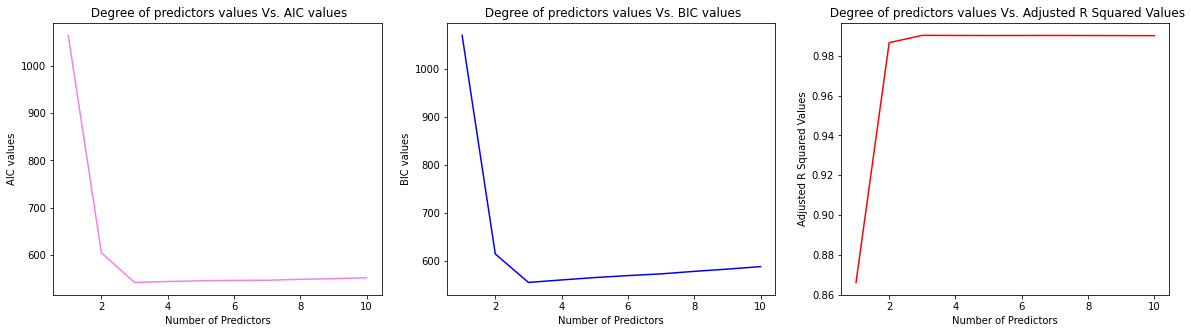

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,3,1)
sns.lineplot(x = df_min_AIC_values['Number of Combinations'], y = df_min_AIC_values['AIC values'], color = 'violet')
plt.xlabel("Number of Predictors")
plt.ylabel("AIC values")
plt.title(" Degree of predictors values Vs. AIC values")

plt.subplot(1,3,2)
sns.lineplot(x = df_min_BIC_values['Number of Combinations'], y = df_min_BIC_values['BIC values'], color = 'blue')
plt.xlabel("Number of Predictors")
plt.ylabel("BIC values")
plt.title(" Degree of predictors values Vs. BIC values")

plt.subplot(1,3,3)
sns.lineplot(x = df_max_Adj_r_values['Number of Combinations'], y = df_max_Adj_r_values['Adjusted R Squared Values'], color = 'red')
plt.xlabel("Number of Predictors")
plt.ylabel("Adjusted R Squared Values")
plt.title(" Degree of predictors values Vs. Adjusted R Squared Values")
plt.show()

i) We can see that the AIC values tend to increase less than the BIC values as the number of predictors rises.

ii) This demonstrates that the BIC metric would punish more predictors than the AIC.

We see that features with degree 1, degree 2 and degree 3 has the lowest AIC, BIC and maximum Adjusted R-squared value.

In [ ]:
X_best = X_df[AIC_best['features_selected'][:].tolist()[0]]

In [ ]:
X_best.head()

,degree 1,degree 2,degree 3
0,-1.085631,1.178594,-1.279518
1,0.997345,0.994698,0.992057
2,0.282978,0.080077,0.022660
3,-1.506295,2.268924,-3.417668
4,-0.578600,0.334778,-0.193703


In [ ]:
regressor = LinearRegression()
regressor.fit(X_best, y)

LinearRegression()

In [ ]:
print("The best model coefficients are: {}".format(regressor.coef_[0]))

The best model coefficients are: [ 0.91457218  2.06305955 -1.97085806]


**(a)** The best model coefficients are: [ 0.91457218 , 2.06305955 , -1.97085806]

**Forward Subset Selection**

In [ ]:
AIC_values = []
BIC_values = []
best_AIC_values, best_BIC_values, best_Adjusted_R_squared_values = [], [], []
best_comb = []
Adjusted_R_squared_values = []
number_of_features = []
features = []
features_list = dict()
features_remaining = list(X_df.columns.values)


for i in range(1, len(X_df.columns) + 1):
    best_AIC_value = np.inf
    for combinations in itertools.combinations(features_remaining, 1):
        result = Ordinary_least_squares_fit(X_df[list(combinations) + features], y)
        
        if result[0] < best_AIC_value:
            
            best_AIC_value = result[0]
            best_BIC_value = result[1]
            best_R_squared_value = result[2]
            best_AIC_values.append(best_AIC_value)
            best_BIC_values.append(best_BIC_value)
            best_Adjusted_R_squared_values.append(best_R_squared_value)
            best_comb.append(list(combinations) + features)
            number_of_features.append(len(list(combinations) + features))
            best_feature = combinations[0]
            
    features.append(best_feature) 
    features_remaining.remove(best_feature)
    AIC_values.append(best_AIC_value)
    BIC_values.append(best_BIC_value)
    Adjusted_R_squared_values.append(best_R_squared_value)
    features_list[i] = features.copy()

In [ ]:
df = pd.DataFrame({'features_selected': best_comb, 'AIC values': best_AIC_values, 'BIC values': best_BIC_values, 'Adjusted R Squared Values': best_Adjusted_R_squared_values, 'Number of Features': number_of_features})

In [ ]:
df.head(10)

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Features
0,[degree 1],1356.768181,1363.364816,0.421163,1
1,[degree 3],1065.501335,1072.097970,0.865079,1
2,[degree 5],1063.848982,1070.445617,0.866189,1
3,"[degree 1, degree 5]",1029.184072,1039.079024,0.888038,2
4,"[degree 2, degree 5]",962.814068,972.709020,0.919656,2
5,"[degree 1, degree 5, degree 2]",819.762062,832.955331,0.960899,3
6,"[degree 3, degree 5, degree 2]",575.614422,588.807691,0.988465,3
7,"[degree 1, degree 5, degree 2, degree 3]",544.257773,560.749360,0.990187,4
8,"[degree 4, degree 5, degree 2, degree 3, degre...",546.211239,566.001144,0.990138,5
9,"[degree 7, degree 5, degree 2, degree 3, degre...",546.190269,565.980174,0.990139,5


In [ ]:
df_min_AIC_values = df[df.groupby('Number of Features')['AIC values'].transform(min)== df['AIC values']]
df_min_BIC_values = df[df.groupby('Number of Features')['BIC values'].transform(min)== df['BIC values']]
df_max_Adj_r_values = df[df.groupby('Number of Features')['Adjusted R Squared Values'].transform(max)==df['Adjusted R Squared Values']]

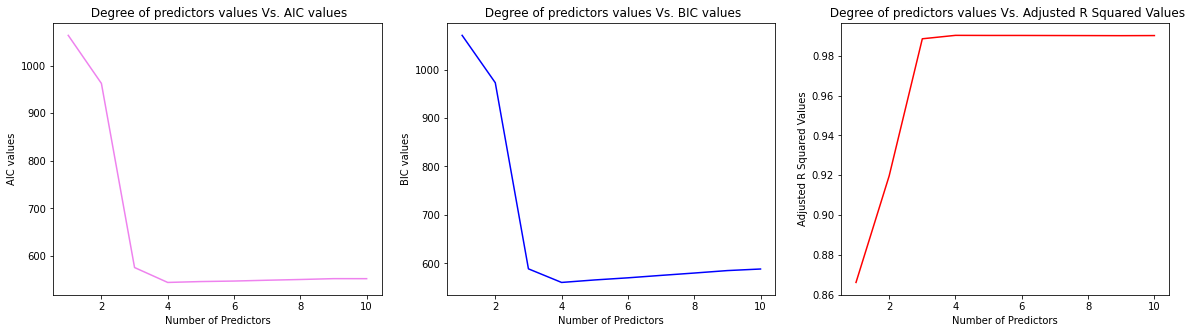

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,3,1)
sns.lineplot(x = df_min_AIC_values['Number of Features'], y = df_min_AIC_values['AIC values'], color = 'violet')
plt.xlabel("Number of Predictors")
plt.ylabel("AIC values")
plt.title(" Degree of predictors values Vs. AIC values")

plt.subplot(1,3,2)
sns.lineplot(x = df_min_BIC_values['Number of Features'], y = df_min_BIC_values['BIC values'], color = 'blue')
plt.xlabel("Number of Predictors")
plt.ylabel("BIC values")
plt.title(" Degree of predictors values Vs. BIC values")

plt.subplot(1,3,3)
sns.lineplot(x = df_max_Adj_r_values['Number of Features'], y = df_max_Adj_r_values['Adjusted R Squared Values'], color = 'red')
plt.xlabel("Number of Predictors")
plt.ylabel("Adjusted R Squared Values")
plt.title(" Degree of predictors values Vs. Adjusted R Squared Values")
plt.show()

In [ ]:
AIC_best = df[df['AIC values']==min(df['AIC values'])]
BIC_best = df[df['BIC values']==min(df['BIC values'])]
Adj_r_best = df[df['Adjusted R Squared Values']==max(df['Adjusted R Squared Values'])] 

In [ ]:
AIC_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Features
7,"[degree 1, degree 5, degree 2, degree 3]",544.257773,560.74936,0.990187,4


In [ ]:
BIC_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Features
7,"[degree 1, degree 5, degree 2, degree 3]",544.257773,560.74936,0.990187,4


In [ ]:
Adj_r_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Features
7,"[degree 1, degree 5, degree 2, degree 3]",544.257773,560.74936,0.990187,4


In [ ]:
X_best = X_df[AIC_best['features_selected'][:].tolist()[0]]

In [ ]:
regressor = LinearRegression()
regressor.fit(X_best, y)

LinearRegression()

In [ ]:
print("The best model coefficients are: {}".format(regressor.coef_[0]))

The best model coefficients are: [ 9.00525882e-01 -1.09796498e-03  2.06083460e+00 -1.96089198e+00]


(b) 

We can observe that after conducting subset selection, the attributes that remain are degree 1, degree 2, and degree 3.
On the other hand, the only input characteristics left for the forward feature selection are degree 1, degree 2, degree 3, and degree 5.

In [ ]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(x.reshape(-1, 1))
X_poly = X_poly[:,1:]

In [ ]:
param = {'alpha' : np.arange(0, 5, 0.01)}
gscv_lasso = GridSearchCV(Lasso(),param_grid=param,scoring='neg_mean_squared_error')
gscv_lasso.fit(X_poly, y)
gscv_lasso.best_params_

{'alpha': 0.05}

In [ ]:
gscv_lasso.cv_results_['mean_test_score']

array([  -1.40483396,   -1.36147564,   -1.29638914,   -1.20499566,
         -1.15914376,   -1.12754522,   -1.15305235,   -1.20169456,
         -1.25080379,   -1.30367467,   -1.36027906,   -1.42074629,
         -1.48502434,   -1.55340626,   -1.62584359,   -1.70322821,
         -1.78462101,   -1.87017517,   -1.96020166,   -2.05436653,
         -2.15265393,   -2.25535935,   -2.36208066,   -2.47341196,
         -2.58863723,   -2.73298707,   -2.80765456,   -2.7721719 ,
         -2.69619506,   -2.60201867,   -2.49681462,   -2.39237278,
         -2.29265105,   -2.19922409,   -2.14399072,   -2.10811337,
         -2.0528486 ,   -1.9861901 ,   -1.91436531,   -1.84285965,
         -1.77624529,   -1.71834546,   -1.67248051,   -1.64098527,
         -1.62567446,   -1.62808561,   -1.64937125,   -1.69050614,
         -1.75210949,   -1.83448288,   -1.93807535,   -2.06317899,
         -2.20999961,   -2.37880994,   -2.56991564,   -2.78312873,
         -3.01825709,   -3.27520608,   -3.55429339,   -3.85554

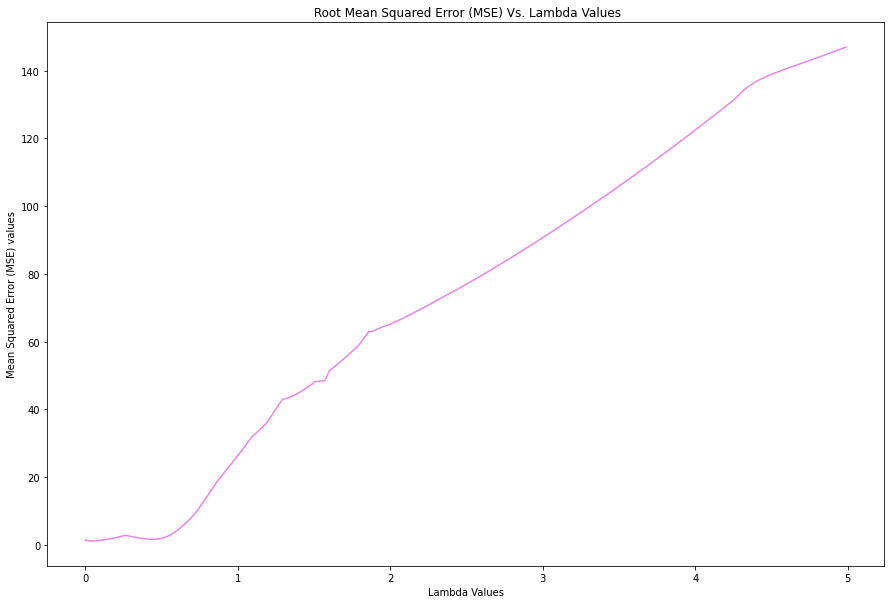

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = np.arange(0, 5, 0.01), y = np.abs(gscv_lasso.cv_results_['mean_test_score']), color = 'violet')
plt.xlabel("Lambda Values")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title(" Root Mean Squared Error (MSE) Vs. Lambda Values")
plt.show()

*The optimal value of Lambda based on the set of values that we've taken is lambda = 0.05*

In [ ]:
optimal_lambda_value = 0.05

In [ ]:
model = Lasso(alpha = optimal_lambda_value) 
model.fit(X_poly, y)

Lasso(alpha=0.05)

In [ ]:
model.coef_

array([ 1.04092640e-01,  1.62378385e+00, -1.24410049e+00,  2.02247418e-01,
       -1.46948151e-01, -3.06992856e-02,  3.27396679e-03,  2.72028620e-04,
        7.37860474e-04,  1.97309226e-04])

**(c)**

i) Lasso CV penalizes characteristics that are ineffective at forecasting the   
   target variable.

ii) Coefficients are as follows: [0.10409264,1.62378385, -1.24410049, 0.   
    202247418,-0.146948151,-0.0306992856,0.00327396679,0.00027202862, 0. 
    000737860474, 0 .000197309226]

iii) This demonstrates that degree 8, degree 9, and degree 10 aren't   
     particularly helpful in forecasting the target variable because of their 
     tiny coefficients.


*Problem 2*

In [ ]:
# Importing the Training Dataset
df_cost = pd.read_csv('Train_Data.csv')

In [ ]:
df_cost.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494240
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
df_cost = pd.get_dummies(df_cost, columns = ['sex','smoker','region'])

In [ ]:
df_cost.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,25.745000,2,3279.868550,0,1,1,0,1,0,0,0
1,36.976978,25.744165,3,21454.494240,1,0,0,1,0,0,1,0
2,18.000000,30.030000,1,1720.353700,0,1,1,0,0,0,1,0
3,37.000000,30.676891,3,6801.437542,0,1,1,0,1,0,0,0
4,58.000000,32.010000,1,11946.625900,0,1,1,0,0,0,1,0


In [ ]:
 #independent variables / explanatory variables
X = df_cost.drop(labels='charges', axis=1)  
#dependent variable / response / target variable.
y = df_cost['charges']

In [ ]:
#splitting the dataset into 80%-20% train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state=100)

In [ ]:
result = sm.OLS(y_train, X_train).fit()

In [ ]:
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     938.7
Date:                Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:08:14   Log-Likelihood:                -29238.
No. Observations:                2904   AIC:                         5.849e+04
Df Residuals:                    2895   BIC:                         5.855e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                234.4270      8.923  

In [ ]:
y_pred = result.predict(X_test)

In [ ]:
print("The  root mean squared error using least squares on the test set is: {}".format(np.sqrt(mean_squared_error(y_pred, y_test))))

The  root mean squared error using least squares on the test set is: 5647.91055289898


**(b)** The  root mean squared error using least squares on the training set is: 5647.91

In [ ]:
lambda_values = [0.001, 0.01, 0.02, 0.09, 0.16, 0.20, 0.25]
RMSE_list = []
for i in lambda_values:
    model = RidgeCV(alphas = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE_list.append(RMSE)
    print("For Lambda = {}".format(i))
    print("The root mean squared error (RMSE) of Ridge Regression (Lambda = {}) in our dataset for the cross validation data is: {}".format(i, RMSE))
    print("\n")

For Lambda = 0.001
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.001) in our dataset for the cross validation data is: 5647.910629361098


For Lambda = 0.01
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.01) in our dataset for the cross validation data is: 5647.911264663592


For Lambda = 0.02
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.02) in our dataset for the cross validation data is: 5647.911975814087


For Lambda = 0.09
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.09) in our dataset for the cross validation data is: 5647.917018903145


For Lambda = 0.16
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.16) in our dataset for the cross validation data is: 5647.92215909728


For Lambda = 0.2
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.2) in our dataset for the cross validation data is: 5647.925139990544


For Lambda = 0.25
The root mean squared error (RMSE) 

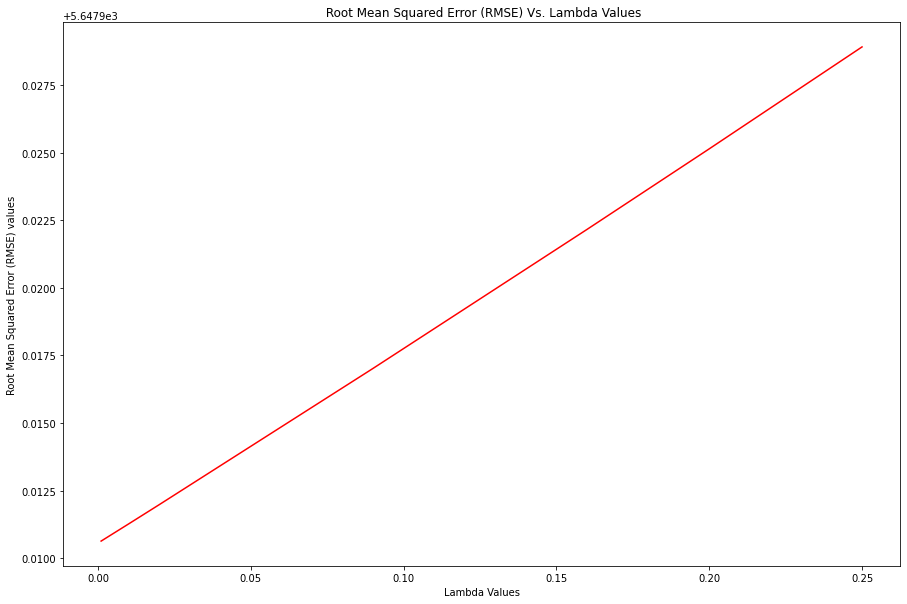

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = lambda_values, y = RMSE_list, color = 'red')
plt.xlabel("Lambda Values")
plt.ylabel("Root Mean Squared Error (RMSE) values")
plt.title(" Root Mean Squared Error (RMSE) Vs. Lambda Values")
plt.show()

*Therefore, the best value of lambda based on the results above is 0.001*

In [ ]:
best_lambda = 0.001

In [ ]:
model = RidgeCV(alphas = best_lambda)
model.fit(X_train, y_train)

RidgeCV(alphas=array(0.001))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) of Ridge Regression in our dataset for the test set is: {}".format(RMSE))

The root mean squared error (RMSE) of Ridge Regression in our dataset for the test set is: 5647.910629361098


**(c)** The root mean squared error (RMSE) of Ridge Regression in our dataset for the test set is: 5647.91

In [ ]:
model = LassoCV(alphas = [0.01, 0.02, 0.09, 0.16, 0.20, 0.25], cv = 10, normalize =True).fit(X_train, y_train)
y_pred = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) of Lasso Regression in our dataset for the test set is: {}".format(RMSE))

The root mean squared error (RMSE) of Lasso Regression in our dataset for the test set is: 5647.8859349377135


In [ ]:
model.alpha_

0.01

In [ ]:
model.coef_

array([ 2.34383393e+02,  2.92633233e+02,  5.68568852e+02, -1.09854742e+03,
        1.81810690e-12, -2.28587225e+04,  0.00000000e+00,  2.15455076e+03,
       -1.41110731e+01,  3.35416286e+02, -2.50968302e+02])

**(d)**

(i) The best value of lambda based on the above results is 0.01

(ii) The root mean squared error (RMSE) of Lasso Regression in our dataset for the test set is: 5647.88

(iii) From the above, there is 1 zero coefficient & the number of non-zero coefficient estimates in Lasso Regression is 10 respectively.



In [ ]:
num_of_components = []
RMSE_values = []
for i in range(1,11):
    PCA_model = PCA(n_components = i)
    reduced_features_train = PCA_model.fit_transform(X_train)
    reduced_features_test = PCA_model.transform(X_test)
    regressor = LinearRegression()

    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(regressor, reduced_features_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    num_of_components.append(i)
    RMSE_values.append(cross_validation_scores.mean())
    print("For Principle Component = {}".format(i))
    print("The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: {}".format(np.sqrt(cross_validation_scores.mean())))
    print("\n")

For Principle Component = 1
The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 10308.19029314122


For Principle Component = 2
The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 10156.68120978033


For Principle Component = 3
The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 10142.588455050425


For Principle Component = 4
The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 9798.48868341801


For Principle Component = 5
The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 8650.994131235193


For Principle Component = 6
The  root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 6609.213833224702


For Principle Component = 7
The  root mean squared error (RMSE) of Linear Re

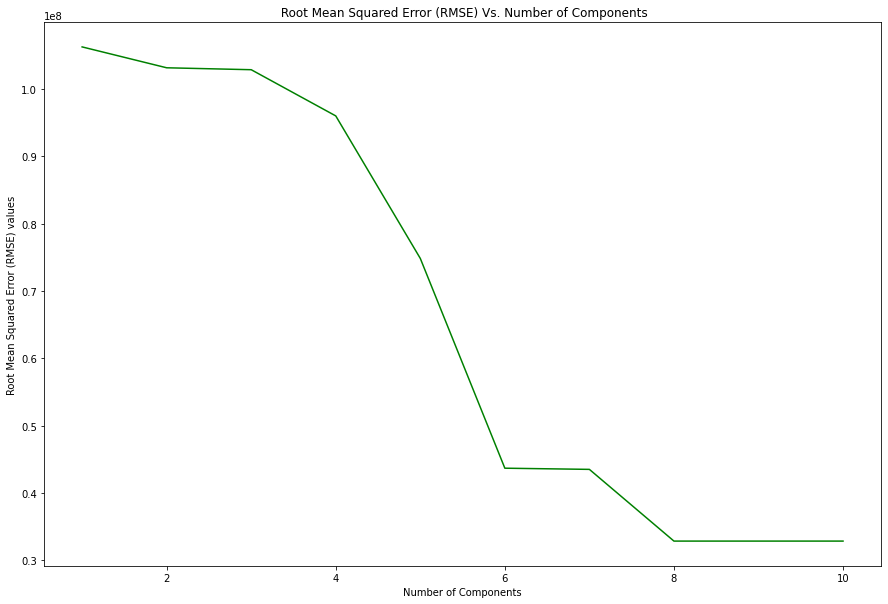

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = num_of_components, y = RMSE_values, color = 'green')
plt.xlabel("Number of Components")
plt.ylabel("Root Mean Squared Error (RMSE) values")
plt.title(" Root Mean Squared Error (RMSE) Vs. Number of Components")
plt.show()

*As a result, 8 is the ideal choice for the Number of Components because it considerably reduces the Root Mean Squared Error while also capturing the majority of the data*.

In [ ]:
optimal_number_of_components = 8

In [ ]:
PCA_model = PCA(n_components = optimal_number_of_components)
reduced_features_train = PCA_model.fit_transform(X_train)
reduced_features_test = PCA_model.transform(X_test)
regressor = LinearRegression()
regressor.fit(reduced_features_train, y_train)
y_pred = regressor.predict(reduced_features_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("For Principle Component = {}".format(optimal_number_of_components))
print("The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: {}".format(RMSE))

For Principle Component = 8
The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: 5647.910552898977


**(e)** The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: 5647.9105

In [ ]:
num_of_components = []
RMSE_values = []
for i in range(1,8):
    PLS_model = PLSRegression(n_components = i)

    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(PLS_model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    num_of_components.append(i)
    RMSE_values.append(cross_validation_scores.mean())
    print("For Number of Components = {}".format(i))
    print("The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: {}".format(np.sqrt(cross_validation_scores.mean())))
    print("\n")

For Number of Components = 1
The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 6046.621534811975


For Number of Components = 2
The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 5736.601791289248


For Number of Components = 3
The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 5721.787223858815


For Number of Components = 4
The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 5719.3996947532


For Number of Components = 5
The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 5719.62227355013


For Number of Components = 6
The  root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 5719.586620560002


For Number of Components = 7
The  root mean squared error (RMSE) of PLS Regression in our d

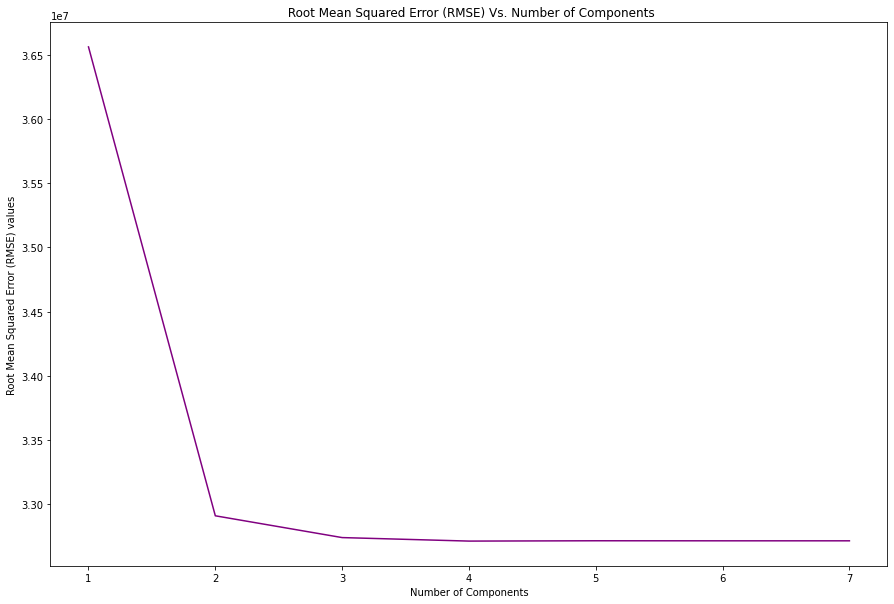

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = num_of_components, y = RMSE_values, color = 'purple')
plt.xlabel("Number of Components")
plt.ylabel("Root Mean Squared Error (RMSE) values")
plt.title(" Root Mean Squared Error (RMSE) Vs. Number of Components")
plt.show()

*As a result, 4 is the ideal option for the Number of Components because it considerably reduces the Root Mean Squared error while also capturing the majority of the data*.

In [ ]:
optimal_number_of_components = 4

In [ ]:
PLS_model = PLSRegression(n_components = optimal_number_of_components)
PLS_model.fit(X_train, y_train)
y_pred = PLS_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("For Number of Components = {}".format(optimal_number_of_components))
print("The root mean squared error (RMSE) of PLS Regression in our dataset for the test set is: {}".format(RMSE))

For Number of Components = 4
The root mean squared error (RMSE) of PLS Regression in our dataset for the test set is: 5647.555264248621


**(f)** The root mean squared error (RMSE) of PLS Regression in our dataset for the test set is: 5647.55

*Problem 3*

In [ ]:
# Importing the DataSet
df_college = pd.read_csv('College.csv')

In [ ]:
df_college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df_college['Accept.Rate'] = df_college['Accept'] / df_college['Apps']

In [ ]:
df_college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


In [ ]:
df_college = pd.get_dummies(df_college, columns = ['Private'])

In [ ]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Enroll       777 non-null    int64  
 1   Top10perc    777 non-null    int64  
 2   Top25perc    777 non-null    int64  
 3   F.Undergrad  777 non-null    int64  
 4   P.Undergrad  777 non-null    int64  
 5   Outstate     777 non-null    int64  
 6   Room.Board   777 non-null    int64  
 7   Books        777 non-null    int64  
 8   Personal     777 non-null    int64  
 9   PhD          777 non-null    int64  
 10  Terminal     777 non-null    int64  
 11  S.F.Ratio    777 non-null    float64
 12  perc.alumni  777 non-null    int64  
 13  Expend       777 non-null    int64  
 14  Grad.Rate    777 non-null    int64  
 15  Accept.Rate  777 non-null    float64
 16  Private_Yes  777 non-null    uint8  
dtypes: float64(2), int64(14), uint8(1)
memory usage: 98.0 KB


In [ ]:
#independent variables / explanatory variables
X = df_college.drop(labels='Accept.Rate', axis=1)  
#dependent variable / response / target variable.
y = df_college['Accept.Rate']

**(a)**

In [ ]:
#splitting the dataset into 80%-20% train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state=100)

In [ ]:
X_train.head()

,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
474,211,28,52,735,28,15200,4100,350,650,87,90,9.4,49,12472,64,1
225,575,42,78,1944,46,19964,4328,500,500,94,95,12.1,32,14720,83,1
173,314,33,66,1065,48,8730,3523,500,750,82,92,13.2,35,9303,67,1
399,334,18,36,1114,94,7400,3346,600,600,57,57,19.8,7,6869,58,1
427,1173,16,56,6441,3982,9114,4030,400,650,88,90,19.7,13,6637,53,0


In [ ]:
# Fitting a regression tree to the training set
regressor = DecisionTreeRegressor(random_state = 100)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
print("The mean squared error for Decision Tree Regressor is: {}".format(mean_squared_error(y_pred, y_test)))

The mean squared error for Decision Tree Regressor is: 0.024413053965680945


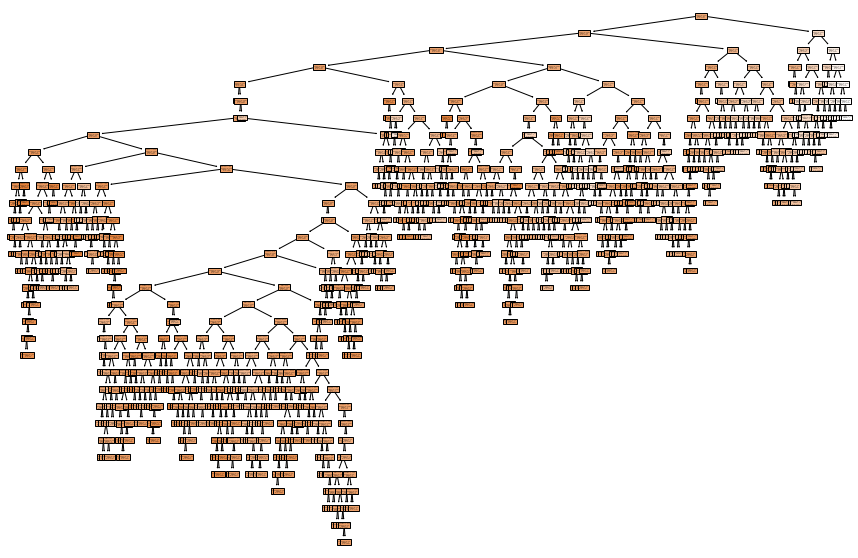

In [ ]:
fig = plt.figure(figsize = (15, 10))
plot_tree(regressor, feature_names = X_train.columns, filled = True)
plt.show()

**(b)** 

Without specifying the depth, choosing a decision tree would proceed to the maximum depth until further value splitting was impossible. As a result, we can observe that the decision tree has fully developed and considers a variety of factors before deciding on the acceptance rate.



*The mean squared error of the test set is 0.02441 respectively*.

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
max_depth = []
MSE_values = []
for i in range(2,15):
    regressor = DecisionTreeRegressor(max_depth = i, random_state = 100)
    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(regressor, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    max_depth.append(i)
    MSE_values.append(cross_validation_scores.mean())

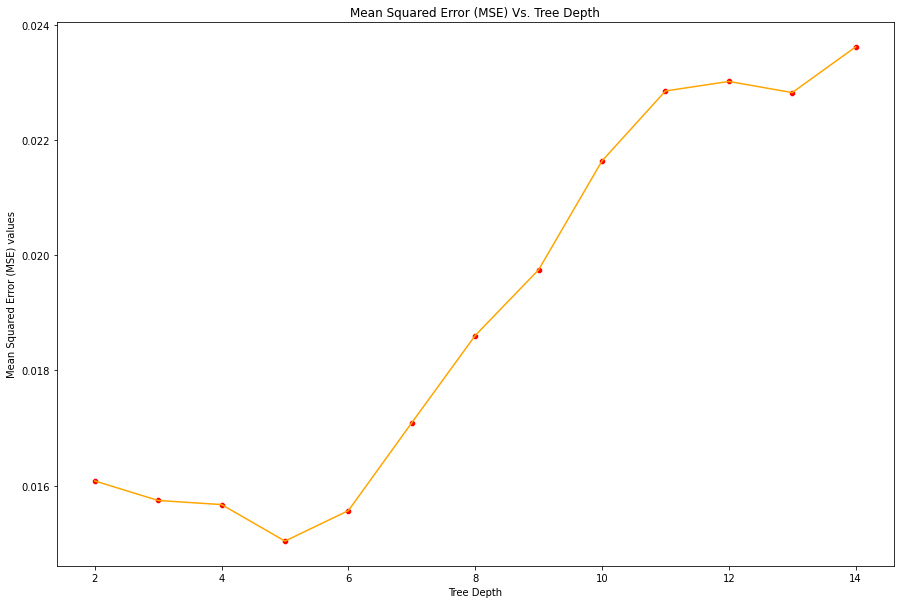

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = max_depth, y = MSE_values, color = 'orange')
sns.scatterplot(x = max_depth, y = MSE_values, color = 'red')
plt.xlabel("Tree Depth")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Tree Depth")
plt.show()

In [ ]:
min_samples_split = []
MSE_values = []
for i in range(20,100):
    regressor = DecisionTreeRegressor(min_samples_split = i, random_state = 100)
    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(regressor, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    min_samples_split.append(i)
    MSE_values.append(cross_validation_scores.mean())

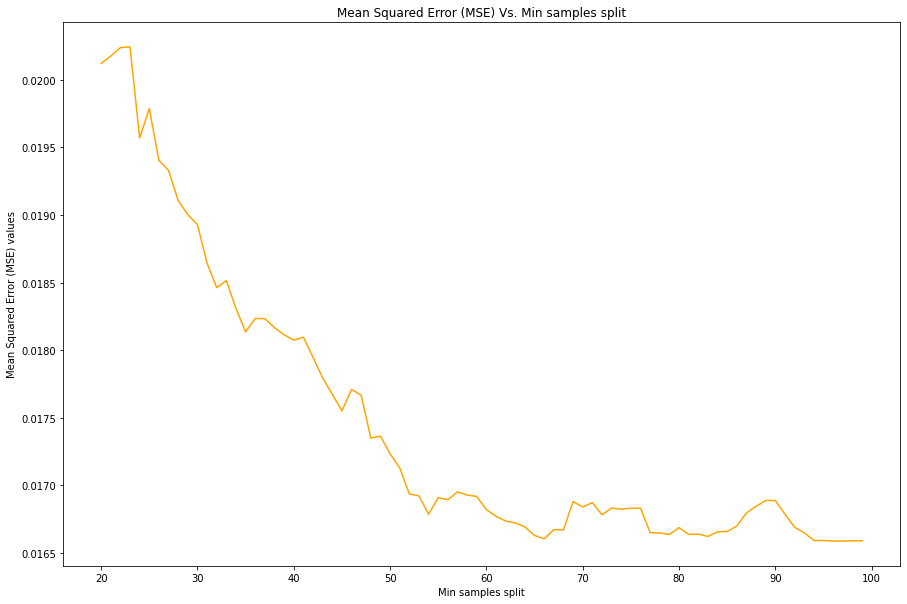

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = min_samples_split, y = MSE_values, color = 'orange')
plt.xlabel("Min samples split")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples split")
plt.show()

In [ ]:
min_samples_leaf = []
MSE_values = []
for i in range(20,50):
    regressor = DecisionTreeRegressor(min_samples_leaf = i, random_state = 100)
    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(regressor, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    min_samples_leaf.append(i)
    MSE_values.append(cross_validation_scores.mean())

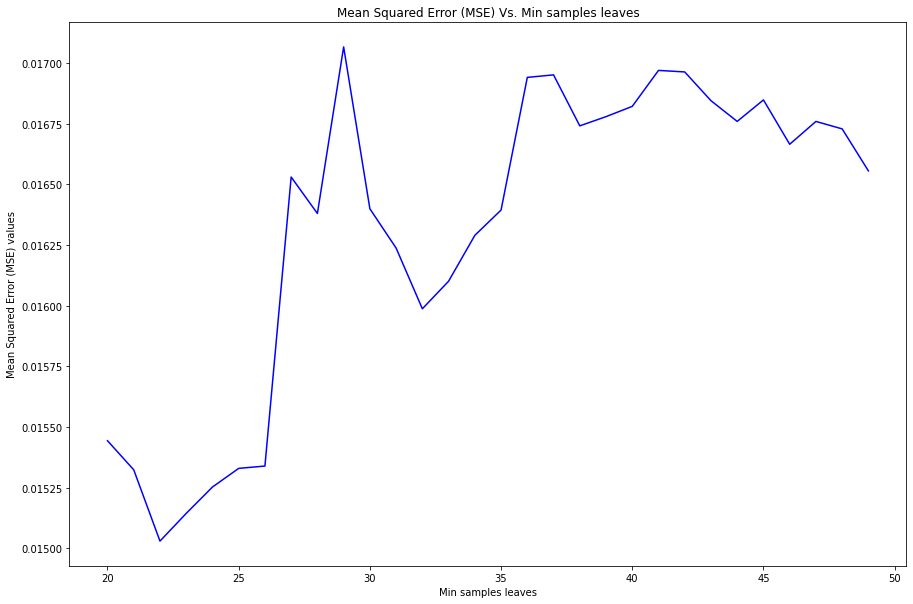

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = min_samples_leaf, y = MSE_values, color = 'blue')
plt.xlabel("Min samples leaves")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples leaves")
plt.show()

In [ ]:
optimal_depth = 5
optimal_min_samples_split = 100
optimal_min_samples_leaves = 22

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split = optimal_min_samples_split, min_samples_leaf = optimal_min_samples_leaves, max_depth = optimal_depth, random_state = 100)

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print("The mean squared error of the optimal tree is: {}".format(mean_squared_error(y_pred, y_test)))

The mean squared error of the optimal tree is: 0.013623508940859784


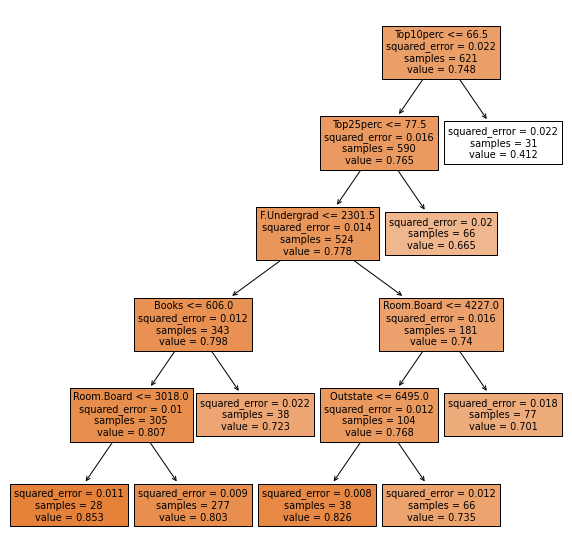

In [ ]:
fig = plt.figure(figsize = (10, 10))
plot_tree(regressor, feature_names = X_train.columns, filled = True)
plt.show()

**(c)**

The mean square error decreased from 0.02441 to 0.0136 using the optimal values of max depth, min samples split, and min samples leaf, according to the findings of obtaining the optimal tree.

The plot that is visible above is easily readable and highlights the best characteristics that were crucial to classifying the data for easier interpretation. The plot that we have seen in model b) uses many parameters and goes all the way down the tree.

In [ ]:
regressor = BaggingRegressor(DecisionTreeRegressor())
regressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
print("The mean squared error for Decision Tree Regressor is: {}".format(mean_squared_error(y_pred, y_test)))

The mean squared error for Decision Tree Regressor is: 0.012056960207760798


In [ ]:
feature_importances_ = np.mean([tree.feature_importances_ for tree in regressor.estimators_], axis=0)

In [ ]:
print("The Feature Importance Values using Decision Trees is: \n\n{}".format(feature_importances_))

The Feature Importance Values using Decision Trees is: 

[0.03634473 0.28622401 0.08498231 0.05597338 0.05572857 0.10036945
 0.05527388 0.05056982 0.0363252  0.02693276 0.02887996 0.04042591
 0.03274361 0.04330212 0.06281567 0.00310863]


In [ ]:
feature_importance_dictionary = {'Features': X_train.columns, 'Feature Importance': feature_importances_}
importance_dataframe = pd.DataFrame(feature_importance_dictionary)
importance_dataframe.sort_values(by = 'Feature Importance', ascending = False)

,Features,Feature Importance
1,Top10perc,0.286224
5,Outstate,0.100369
2,Top25perc,0.084982
14,Grad.Rate,0.062816
3,F.Undergrad,0.055973
4,P.Undergrad,0.055729
6,Room.Board,0.055274
7,Books,0.050570
13,Expend,0.043302
11,S.F.Ratio,0.040426


(d) 

As can be seen from the above, the attributes Top10perc, Outstate, and Top25perc are crucial for our decision trees. Bagging results in a test mean squared error that is approximately 0.0120 respectively.

In [ ]:
regressor = RandomForestRegressor(random_state = 100)

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print("The mean squared error for Random Forest Regressor is: {}".format(mean_squared_error(y_pred, y_test)))

The mean squared error for Random Forest Regressor is: 0.01062015610152037


In [ ]:
print("The feature importance for Random Forest Regressor is: \n{}".format(regressor.feature_importances_))

The feature importance for Random Forest Regressor is: 
[0.0328752  0.2554553  0.11795252 0.04831847 0.04461526 0.10776416
 0.0632767  0.05268807 0.03592753 0.02736798 0.02490076 0.03135445
 0.0290134  0.04007281 0.08680337 0.00161402]


In [ ]:
feature_importance_dictionary = {'Features': X_train.columns, 'Feature Importance': feature_importances_}
importance_dataframe = pd.DataFrame(feature_importance_dictionary)
importance_dataframe.sort_values(by = 'Feature Importance', ascending = False)

,Features,Feature Importance
1,Top10perc,0.286224
5,Outstate,0.100369
2,Top25perc,0.084982
14,Grad.Rate,0.062816
3,F.Undergrad,0.055973
4,P.Undergrad,0.055729
6,Room.Board,0.055274
7,Books,0.050570
13,Expend,0.043302
11,S.F.Ratio,0.040426


In [ ]:
num_of_estimators = [100, 200, 300, 400, 500]
MSE_values = []
for i in num_of_estimators:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 100)
    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(regressor, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    MSE_values.append(cross_validation_scores.mean())

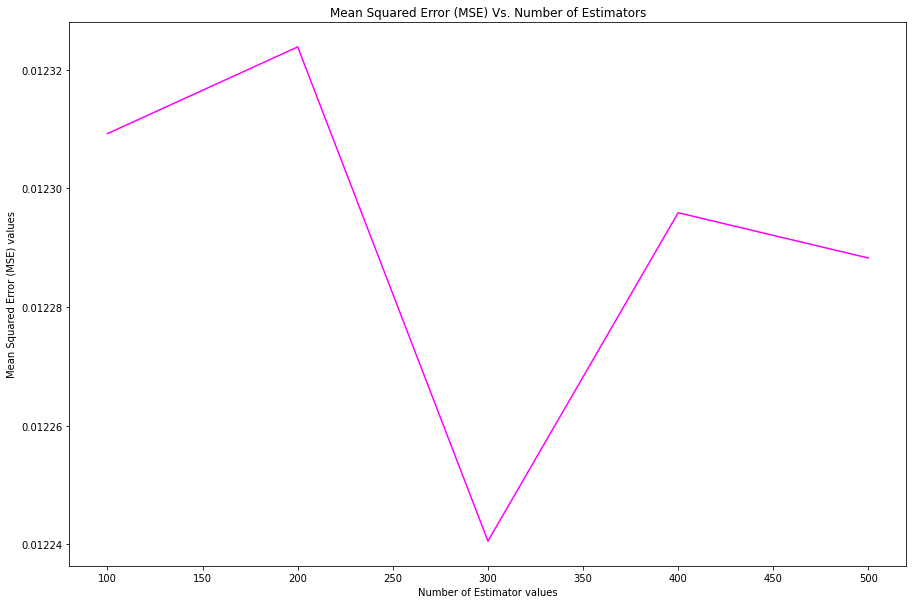

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = num_of_estimators, y = MSE_values, color = 'magenta')
plt.xlabel("Number of Estimator values")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of Estimators")
plt.show()

In [ ]:
num_of_features = []
MSE_values = []
for i in range(2,15):
    regressor = RandomForestRegressor(max_features = i, random_state = 100)
    # Performing 10-fold cross validation 
    cross_validation_scores = -cross_val_score(regressor, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')
    num_of_features.append(i)
    MSE_values.append(cross_validation_scores.mean())

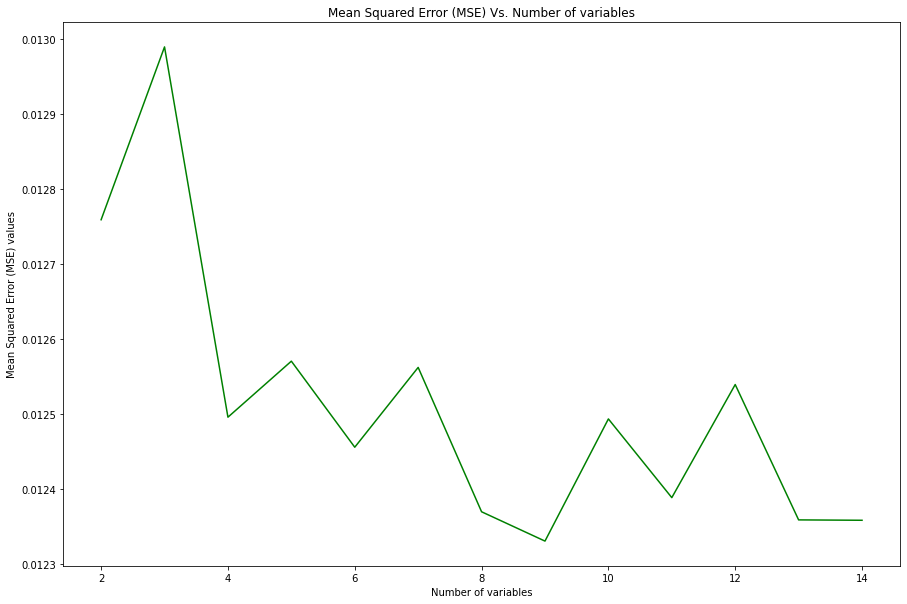

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = num_of_features, y = MSE_values, color = 'green')
plt.xlabel("Number of variables")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of variables")
plt.show()

In [ ]:
optimal_estimators = 300
optimal_features = 9

In [ ]:
regressor = RandomForestRegressor(n_estimators = optimal_estimators, max_features = optimal_features, random_state = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=9, n_estimators=300, random_state=100)

In [ ]:
y_pred = regressor.predict(X_test)
print("The Mean Squared Error of the optimal Random Forest Regressor is: {}".format(mean_squared_error(y_pred, y_test)))

The Mean Squared Error of the best Random Forest Regressor is: 0.010687725740950416


**(e)**

The optimal Random Forest Regressor's mean squared error is approximately 0. 0106. The MSE remains unchanged when the optimal values for the number of trees = 300, and features = 9 are taken into account.

Our random forest regressor identifies Top25perc, Top10perc, and Outstate as the three most crucial attributes.

*Problem 4*

In [335]:
# Importing the DataSet
df_penguins = pd.read_csv('penguins_size.csv')

In [336]:
df_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [337]:
#checking how many features have null values
df_penguins.isnull

<bound method DataFrame.isnull of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     

In [338]:
#dropping all the null values
df_penguins = df_penguins.dropna()

In [339]:
df_penguins = pd.get_dummies(df_penguins, columns = ['island','sex'])

In [340]:
df_penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,0,1


In [341]:
# Columns not useful in model building are simply dropped
df_penguins = df_penguins.drop(['sex_.','sex_MALE'], axis = 1)

In [342]:
df_penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0


In [343]:
#independent variables / explanatory variables
X = df_penguins.drop(labels='species', axis=1)  
#dependent variable / response / target variable.
y = df_penguins['species']

In [344]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE
0,39.1,18.7,181.0,3750.0,0,0,1,0
1,39.5,17.4,186.0,3800.0,0,0,1,1
2,40.3,18.0,195.0,3250.0,0,0,1,1
4,36.7,19.3,193.0,3450.0,0,0,1,1
5,39.3,20.6,190.0,3650.0,0,0,1,0


In [345]:
#splitting the dataset into 80%-20% train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state=100)

In [346]:
training_data = pd.concat([X_train, y_train], axis = 1, ignore_index = False)
testing_data = pd.concat([X_test, y_test], axis = 1, ignore_index = False)

In [288]:
resampled_training_data = resample(training_data, n_samples = 100, random_state = 100)

In [289]:
resampled_training_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,species
130,38.5,17.9,190.0,3325.0,0,0,1,1,Adelie
235,49.3,15.7,217.0,5850.0,1,0,0,0,Gentoo
204,45.7,17.3,193.0,3600.0,0,1,0,1,Chinstrap
311,52.2,17.1,228.0,5400.0,1,0,0,0,Gentoo
281,46.2,14.9,221.0,5300.0,1,0,0,0,Gentoo
...,...,...,...,...,...,...,...,...,...
132,36.8,18.5,193.0,3500.0,0,1,0,1,Adelie
217,49.6,18.2,193.0,3775.0,0,1,0,0,Chinstrap
31,37.2,18.1,178.0,3900.0,0,1,0,0,Adelie
342,45.2,14.8,212.0,5200.0,1,0,0,1,Gentoo


In [290]:
resampled_X_data = resampled_training_data.drop(labels='species', axis=1)
resampled_y_data = resampled_training_data['species']

In [291]:
num_of_p_values = {}
for a in range(1,9):
  b = list(range(0,a))
  if b != []:
    num_of_p_values[a] = 1- np.mean(cross_val_score(DecisionTreeClassifier(), resampled_X_data.iloc[:,b], resampled_y_data))
    print("For Number of p Values = {}".format(num_of_p_values.keys()))
    print("The Cross-Validation Error (CVE) in our dataset  is: {}".format(num_of_p_values.values()))
    print("\n")

For Number of p Values = dict_keys([1])
The Cross-Validation Error (CVE) in our dataset  is: dict_values([0.27])


For Number of p Values = dict_keys([1, 2])
The Cross-Validation Error (CVE) in our dataset  is: dict_values([0.27, 0.07999999999999985])


For Number of p Values = dict_keys([1, 2, 3])
The Cross-Validation Error (CVE) in our dataset  is: dict_values([0.27, 0.07999999999999985, 0.07999999999999985])


For Number of p Values = dict_keys([1, 2, 3, 4])
The Cross-Validation Error (CVE) in our dataset  is: dict_values([0.27, 0.07999999999999985, 0.07999999999999985, 0.06999999999999995])


For Number of p Values = dict_keys([1, 2, 3, 4, 5])
The Cross-Validation Error (CVE) in our dataset  is: dict_values([0.27, 0.07999999999999985, 0.07999999999999985, 0.06999999999999995, 0.06999999999999995])


For Number of p Values = dict_keys([1, 2, 3, 4, 5, 6])
The Cross-Validation Error (CVE) in our dataset  is: dict_values([0.27, 0.07999999999999985, 0.07999999999999985, 0.06999999999999

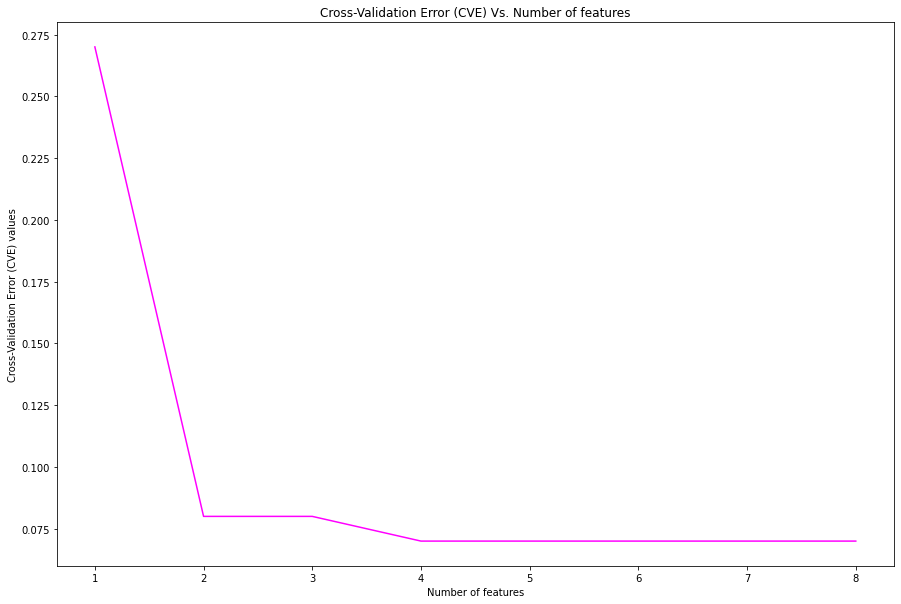

In [292]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = num_of_p_values.keys(), y = num_of_p_values.values(), color = 'magenta')
plt.xlabel("Number of features")
plt.ylabel("Cross-Validation Error (CVE) values")
plt.title("Cross-Validation Error (CVE) Vs. Number of features")
plt.show()

(a) 

As a result, 4 is the ideal option for the Number of features because it considerably reduces the Cross-Validation Error while also capturing the majority of the data.

In [383]:
num_of_trees = [1, 50, 100, 150, 200, 300, 400]
tree_pred = {}
for i in num_of_trees:
  temp = []
  for j in range(i):
    X_train_resampled = resampled_training_data.drop(labels='species', axis=1) 
    X_test_resampled = testing_data.drop(labels='species', axis = 1)
        
    y_train_resampled = resampled_training_data['species']
    y_test_resampled =  testing_data['species']
          
    classifier = DecisionTreeClassifier(max_depth = 6)
    classifier.fit(X_train_resampled, y_train_resampled)
    tree_pred[i] = classifier.predict(X_test_resampled)

In [392]:
df_pred = pd.DataFrame.from_dict(tree_pred)

In [405]:
df_max = df_pred.max()
print(df_max)

1      Gentoo
50     Gentoo
100    Gentoo
150    Gentoo
200    Gentoo
300    Gentoo
400    Gentoo
dtype: object


**(b)** 

Combining the predictions from all trees we found out that 'Gentoo' species of penguin is in predominance based on a majority vote of the predictions of every tree.

In [361]:
# These dictionaries are created for allocation of values for dynamic keys

zero_one_loss_dict_train = {}
zero_one_loss_dict_test = {}

f1_score_dict_train = {}
f1_score_dict_test = {}

auc_score_dict = {}
auc_score_dict_train = {}
auc_score_dict_test = {}

num_of_trees = [1, 50, 100, 150, 200, 300, 400]
for trees in num_of_trees:

  f1_score_values_train = []
  f1_score_values_test = []
  auc_values_train = []
  auc_values_test = []

  for i in range(trees):
       
        X_train_resampled = resampled_training_data.drop(labels='species', axis=1) 
        X_test_resampled = testing_data.drop(labels='species', axis = 1)
        
        y_train_resampled = resampled_training_data['species']
        y_train_resampled = pd.get_dummies(y_train_resampled, columns = ['species'])
        y_test_resampled =  testing_data['species']
        y_test_resampled =  pd.get_dummies(y_test_resampled, columns = ['species'])
          
        classifier = DecisionTreeClassifier(max_depth = 6)
        classifier.fit(X_train_resampled, y_train_resampled)
        y_pred_train = classifier.predict(X_train_resampled)
        y_pred = classifier.predict(X_test_resampled)
  

        zero_one_loss_dict_train["training_auc_scores_trees_" + str(trees)] = zero_one_loss(y_pred_train, y_train_resampled)
        zero_one_loss_dict_test["testing_auc_score_trees_" + str(trees)] = zero_one_loss(y_pred, y_test_resampled)
    
        f1_score_dict_train["training_f1_score_trees_" + str(trees)] = f1_score(y_pred_train, y_train_resampled, average = 'micro')
        f1_score_dict_test["testing_f1_score_trees_" + str(trees)] = f1_score(y_pred, y_test_resampled, average = 'micro')

        auc_score_dict_train["training_auc_scores_trees_" + str(trees)] = roc_auc_score(y_pred_train, y_train_resampled)
        auc_score_dict_test["testing_auc_score_trees_" + str(trees)] = roc_auc_score(y_pred, y_test_resampled)


**(c)**

In [362]:
zero_one_loss_dict_train

{'training_auc_scores_trees_1': 0.0,
 'training_auc_scores_trees_50': 0.0,
 'training_auc_scores_trees_100': 0.0,
 'training_auc_scores_trees_150': 0.0,
 'training_auc_scores_trees_200': 0.0,
 'training_auc_scores_trees_300': 0.0,
 'training_auc_scores_trees_400': 0.0}

In [363]:
zero_one_loss_dict_test

{'testing_auc_score_trees_1': 0.04477611940298509,
 'testing_auc_score_trees_50': 0.04477611940298509,
 'testing_auc_score_trees_100': 0.04477611940298509,
 'testing_auc_score_trees_150': 0.04477611940298509,
 'testing_auc_score_trees_200': 0.04477611940298509,
 'testing_auc_score_trees_300': 0.04477611940298509,
 'testing_auc_score_trees_400': 0.04477611940298509}

In [355]:
f1_score_dict_train

{'training_f1_score_trees_1': 1.0,
 'training_f1_score_trees_50': 1.0,
 'training_f1_score_trees_100': 1.0,
 'training_f1_score_trees_150': 1.0,
 'training_f1_score_trees_200': 1.0,
 'training_f1_score_trees_300': 1.0,
 'training_f1_score_trees_400': 1.0}

In [356]:
f1_score_dict_test

{'testing_f1_score_trees_1': 0.9552238805970149,
 'testing_f1_score_trees_50': 0.9552238805970149,
 'testing_f1_score_trees_100': 0.9552238805970149,
 'testing_f1_score_trees_150': 0.9552238805970149,
 'testing_f1_score_trees_200': 0.9552238805970149,
 'testing_f1_score_trees_300': 0.9552238805970149,
 'testing_f1_score_trees_400': 0.9552238805970149}

In [364]:
auc_score_dict_train

{'training_auc_scores_trees_1': 1.0,
 'training_auc_scores_trees_50': 1.0,
 'training_auc_scores_trees_100': 1.0,
 'training_auc_scores_trees_150': 1.0,
 'training_auc_scores_trees_200': 1.0,
 'training_auc_scores_trees_300': 1.0,
 'training_auc_scores_trees_400': 1.0}

In [365]:
auc_score_dict_test

{'testing_auc_score_trees_1': 0.9627933439329571,
 'testing_auc_score_trees_50': 0.9627933439329571,
 'testing_auc_score_trees_100': 0.9627933439329571,
 'testing_auc_score_trees_150': 0.9567322168948186,
 'testing_auc_score_trees_200': 0.9567322168948186,
 'testing_auc_score_trees_300': 0.9627933439329571,
 'testing_auc_score_trees_400': 0.9627933439329571}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state=100)

In [ ]:
estimator_values = [10, 50, 100]
log_loss_train = []
f1_score_train = []
auc_score_train = []

log_loss_test = []
f1_score_test = []
auc_score_test = []

for estimators in estimator_values:
    classifier = RandomForestClassifier(n_estimators = estimators, random_state = 100)
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    
    log_loss_train.append(log_loss(y_pred_train, y_train))
    f1_score_train.append(f1_score(y_pred_train, y_train, average = 'micro'))
    auc_score_train.append(roc_auc_score(y_pred_train, y_train))

    log_loss_test.append(log_loss(y_pred_train, y_train))
    f1_score_test.append(f1_score(y_pred_train, y_train, average = 'micro'))
    auc_score_test.append(roc_auc_score(y_pred_train, y_train))
    

In [ ]:
for i, estimators in enumerate(estimator_values):
    print("The number of trees in random forest (n = {})".format(estimators))
    print("Training metrics")
    print("The Log loss of the training data for {} trees: {}".format(estimators, log_loss_train[i]))
    print("The f1-score of the training data for {} trees: {}".format(estimators, f1_score_train[i]))
    print("The auc score of the training data for {} trees: {}".format(estimators, auc_score_train[i]))
    
    print('\n')
    print("Test metrics")
    print("The Log loss of the testing data for {} trees: {}".format(estimators, log_loss_test[i]))
    print("The f1-score of the testing data for {} trees: {}".format(estimators, f1_score_test[i]))
    print("The auc score of the testing data for {} trees: {}".format(estimators, auc_score_test[i]))
    print('\n')    

The number of trees in random forest (n = 10)
Training metrics
The Log loss of the training data for 10 trees: 2.101523283316685e-15
The f1-score of the training data for 10 trees: 0.99812382739212
The auc score of the training data for 10 trees: 0.9992138364779874


Test metrics
The Log loss of the testing data for 10 trees: 2.101523283316685e-15
The f1-score of the testing data for 10 trees: 0.99812382739212
The auc score of the testing data for 10 trees: 0.9992138364779874


The number of trees in random forest (n = 50)
Training metrics
The Log loss of the training data for 50 trees: 2.1094237467878e-15
The f1-score of the training data for 50 trees: 1.0
The auc score of the training data for 50 trees: 1.0


Test metrics
The Log loss of the testing data for 50 trees: 2.1094237467878e-15
The f1-score of the testing data for 50 trees: 1.0
The auc score of the testing data for 50 trees: 1.0


The number of trees in random forest (n = 100)
Training metrics
The Log loss of the training d

*We can observe that for 50 trees using the test metrics and a Log loss of 2.1094237467878e-15, the best reduction in log loss is achieved.*

In [ ]:
optimal_num_of_trees = 50
classifier = RandomForestClassifier(n_estimators = optimal_num_of_trees, random_state = 100)
classifier.fit(X_train, y_train)
feature_importance = classifier.feature_importances_

In [ ]:
feature_importance_dictionary = {'Features': X_train.columns, 'Feature Importance': feature_importance}
importance_dataframe = pd.DataFrame(feature_importance_dictionary)
importance_dataframe = importance_dataframe.sort_values(by = 'Feature Importance', ascending = False)

In [ ]:
importance_dataframe

,Features,Feature Importance
0,culmen_length_mm,0.352518
2,flipper_length_mm,0.228441
3,body_mass_g,0.124822
1,culmen_depth_mm,0.111268
5,island_Dream,0.080618
4,island_Biscoe,0.072402
6,island_Torgersen,0.021728
7,sex_FEMALE,0.008202


In [ ]:
## This sorts the feature importance values in descending order. In other words, we get the most important feature first.
top_5_feature_indexes = (-feature_importance).argsort()[: 5]

In [ ]:
print("The top 5 features of the best random forest model is:\n\n {}".format(X_train.columns[top_5_feature_indexes][:]))

The top 5 features of the best random forest model is:

 Index(['culmen_length_mm', 'flipper_length_mm', 'body_mass_g',
       'culmen_depth_mm', 'island_Dream'],
      dtype='object')


(d) 

The top 5 features of the best random forest model is:

 'culmen_length_mm',  'flipper_length_mm',  'body_mass_g',
       'culmen_depth_mm',  'island_Dream'

*Problem 5*

(a) 

σ′(w7 + w8σ(w1 + w3x1 + w5x2) + w9σ(w2 + w4x1 + w6x2)) = 1/exp(−(w7 + cw8w1 + cw9w2 + (cw8w3 + cw9w4)x1 + (cw8w5 + cw9w6)x2))

The classification boundary is : w7 + cw8w1 + cw9w2 + (cw8w3 + cw9w4)x1 + (cw8w5 + cw9w6)x2 = 0

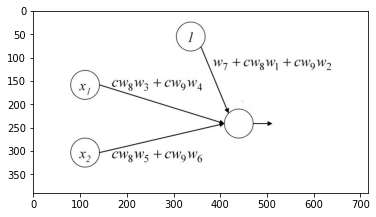

In [421]:
from matplotlib import image as mpimg
image = mpimg.imread("Neural net.jpg")
plt.imshow(image)
plt.show()

(b)

Yes. The output from hidden units will be expressed as a linear combination of input characteristics if linear activation functions are applied to all of the hidden units. We can always discover an analogous neural network that does not include any hidden layers, as demonstrated in the example above, because these intermediate output serve as input for the final output layer.